## Research question

### Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

# Best Classifiers

## XGBoost
### Train Acc= 0.9417040358744395
### Test Acc= 0.7081339712918661

## Random Forest
### Train Acc= 0.952914798206278
### Test Acc= 0.7511961722488039

## Soft Voting
### Test Acc= 0.7679372197309418
### Train Acc= 0.6602870813397129

## KNN(k=6)
### Train Acc= 0.743274
### Test Acc= 0.655502

## Out of Bag on DecisionTree
### Train Accuracy 0.952914798206278
### Test Accuracy 0.7416267942583732
### OOB Score 0.7982062780269058

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 43)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['age', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famrel', 'famsup_no']] 
y_test = X_test['alc']
X_test = X_test[['age', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famrel', 'famsup_no']] 

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

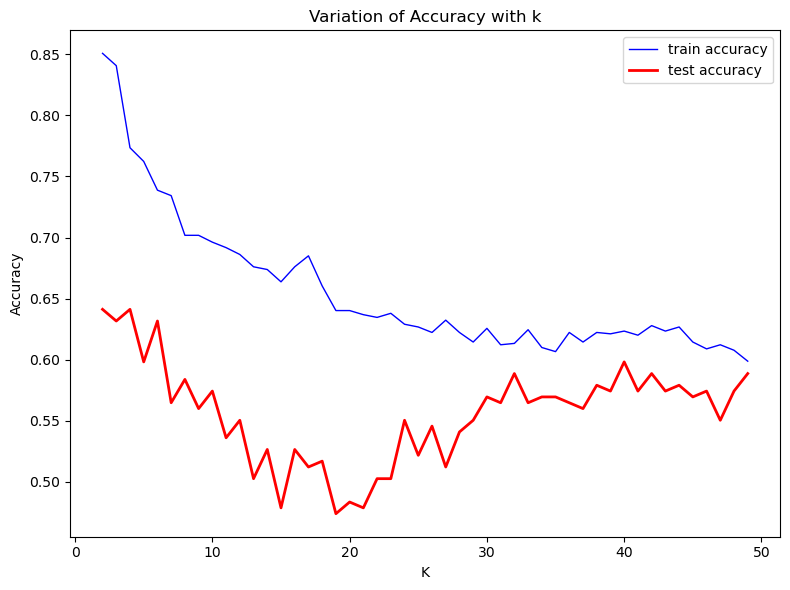

In [12]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [13]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,2,0.850897,0.641148
1,3,0.840807,0.631579
2,4,0.773543,0.641148
3,5,0.762332,0.598086
4,6,0.738789,0.631579
5,7,0.734305,0.564593
6,8,0.701794,0.583732
7,9,0.701794,0.559809
8,10,0.696188,0.574163
9,11,0.691704,0.535885


## Applying suitable value of k in KNN Classifier

In [14]:
best_grid_knn= KNeighborsClassifier(n_neighbors=2)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[106  21]
 [ 54  28]]
Accuracy Score 0.6411483253588517
Classification report:               precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       127
         1.0       0.57      0.34      0.43        82

    accuracy                           0.64       209
   macro avg       0.62      0.59      0.58       209
weighted avg       0.63      0.64      0.62       209



ValueError: Found input variables with inconsistent numbers of samples: [892, 209]

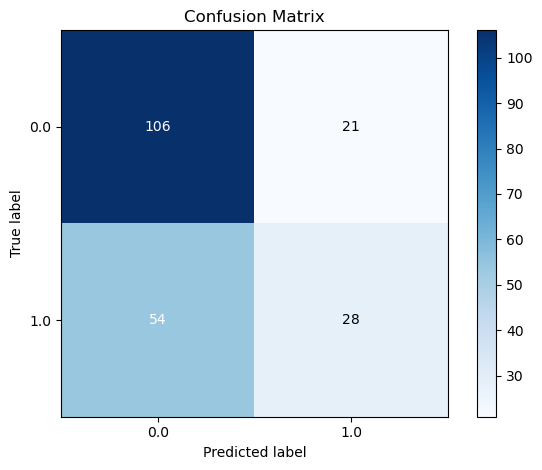

In [15]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')

Classification Report for Train Set
Accuracy Score 0.850896860986547
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       446
         1.0       0.96      0.74      0.83       446

    accuracy                           0.85       892
   macro avg       0.87      0.85      0.85       892
weighted avg       0.87      0.85      0.85       892



C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

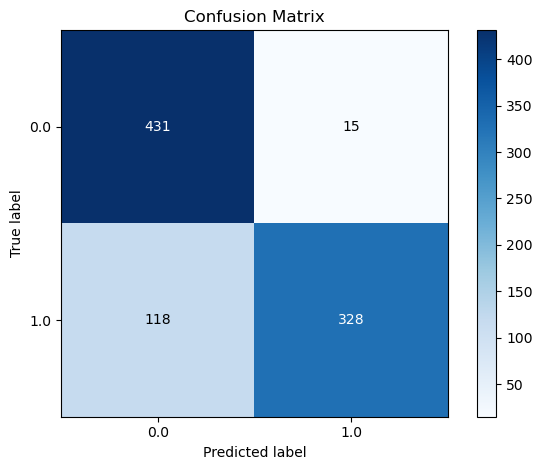

In [16]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [18]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,20),
}

In [19]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 20)},
             verbose=2)

In [20]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=18)

## Appying best estimators on Decision Tree

[[427  19]
 [ 51 395]]
Accuracy Score 0.92152466367713
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       446
         1.0       0.95      0.89      0.92       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



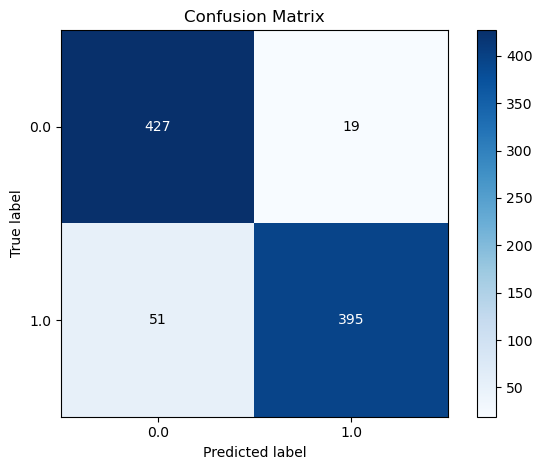

In [21]:
y_pred=best_grid_dt.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Decision Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))


[[99 28]
 [23 59]]
Accuracy Score 0.7559808612440191
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       127
         1.0       0.68      0.72      0.70        82

    accuracy                           0.76       209
   macro avg       0.74      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209



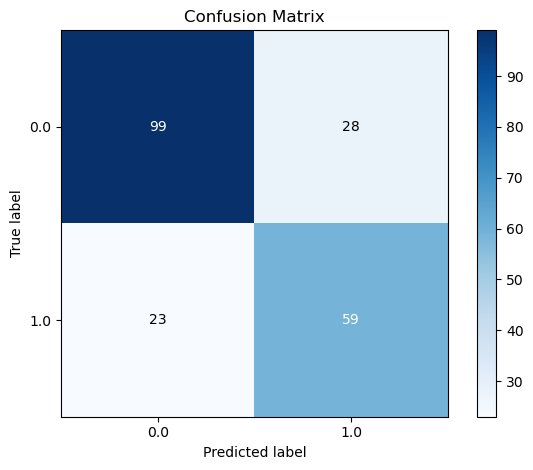

In [22]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))


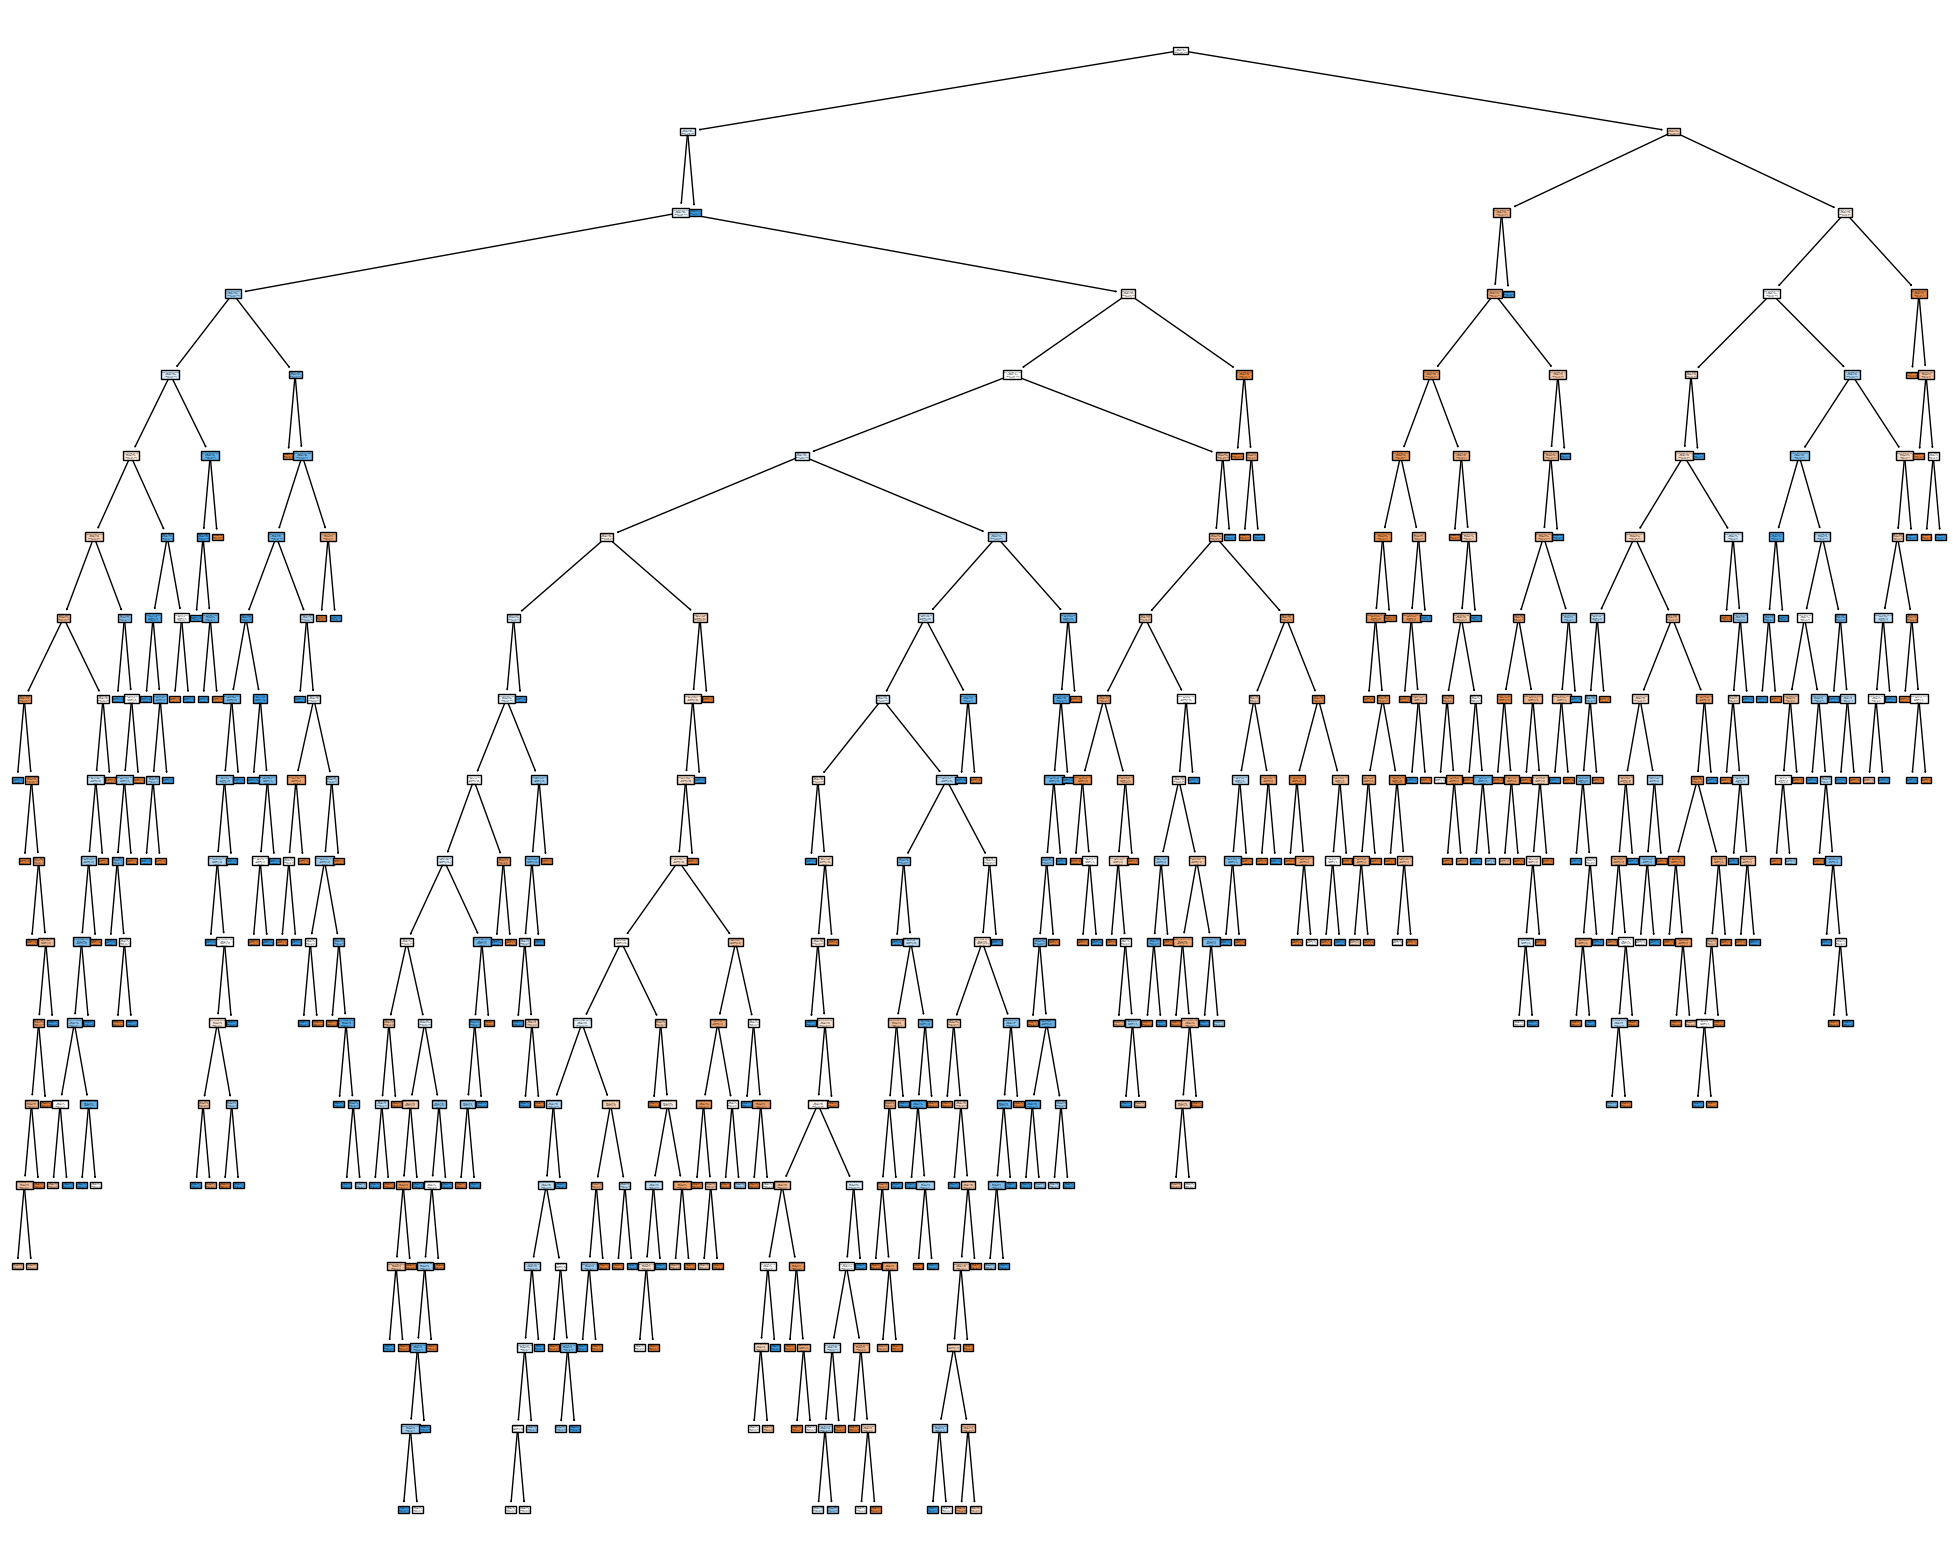

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [24]:
fig.savefig("decision_tree Q3.png")

Max Depth =  1 , Train Acc. =  0.564 , Test Acc. =  0.469
Max Depth =  2 , Train Acc. =  0.564 , Test Acc. =  0.469
Max Depth =  3 , Train Acc. =  0.587 , Test Acc. =  0.569
Max Depth =  4 , Train Acc. =  0.6 , Test Acc. =  0.464
Max Depth =  5 , Train Acc. =  0.654 , Test Acc. =  0.526
Max Depth =  6 , Train Acc. =  0.691 , Test Acc. =  0.622
Max Depth =  7 , Train Acc. =  0.717 , Test Acc. =  0.603
Max Depth =  8 , Train Acc. =  0.731 , Test Acc. =  0.632
Max Depth =  9 , Train Acc. =  0.771 , Test Acc. =  0.675
Max Depth =  10 , Train Acc. =  0.8 , Test Acc. =  0.646
Max Depth =  11 , Train Acc. =  0.824 , Test Acc. =  0.665
Max Depth =  12 , Train Acc. =  0.859 , Test Acc. =  0.708
Max Depth =  13 , Train Acc. =  0.88 , Test Acc. =  0.718
Max Depth =  14 , Train Acc. =  0.901 , Test Acc. =  0.703
Max Depth =  15 , Train Acc. =  0.909 , Test Acc. =  0.722
Max Depth =  16 , Train Acc. =  0.919 , Test Acc. =  0.727
Max Depth =  17 , Train Acc. =  0.922 , Test Acc. =  0.742
Max Depth =

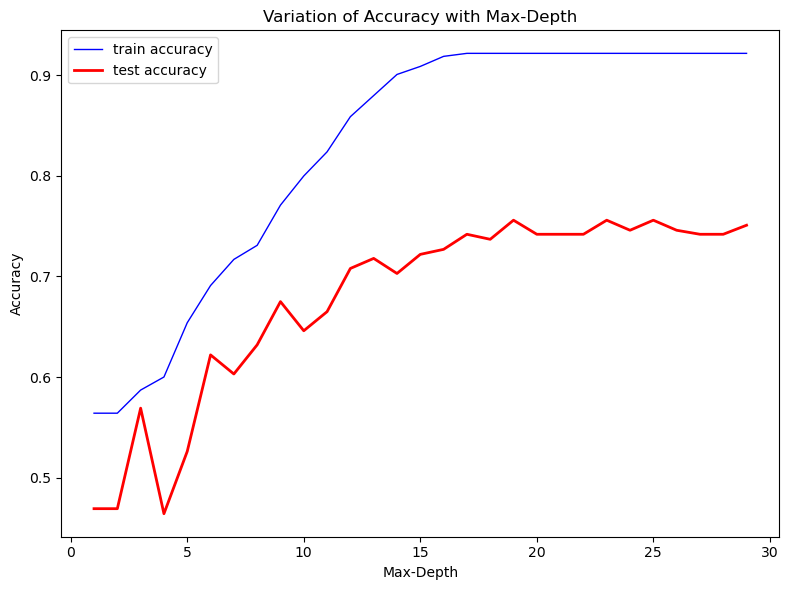

In [25]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [26]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


,0,1
0,427,19
1,51,395


In [27]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,99,28
1,23,59


In [28]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       446
         1.0       0.95      0.89      0.92       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



In [29]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       127
         1.0       0.68      0.72      0.70        82

    accuracy                           0.76       209
   macro avg       0.74      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209



## Hyperparameter Tuning on Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [31]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [32]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\USER\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\USER\anaconda3\lib\site-packages\job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [33]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_features='log2')

## Applying best estimators in Random Forest

In [34]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

### Train

[[417  29]
 [ 41 405]]
Accuracy Score 0.92152466367713
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       446
         1.0       0.93      0.91      0.92       446

    accuracy                           0.92       892
   macro avg       0.92      0.92      0.92       892
weighted avg       0.92      0.92      0.92       892



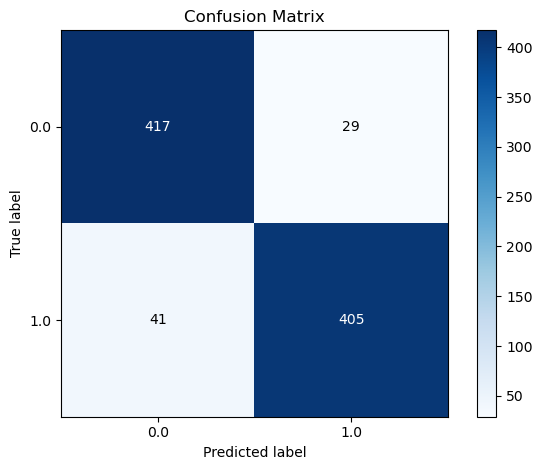

In [35]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [36]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[96 31]
 [23 59]]
Accuracy Score 0.7416267942583732
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78       127
         1.0       0.66      0.72      0.69        82

    accuracy                           0.74       209
   macro avg       0.73      0.74      0.73       209
weighted avg       0.75      0.74      0.74       209



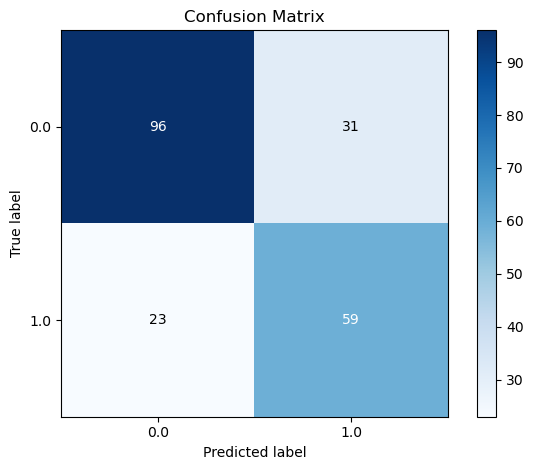

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

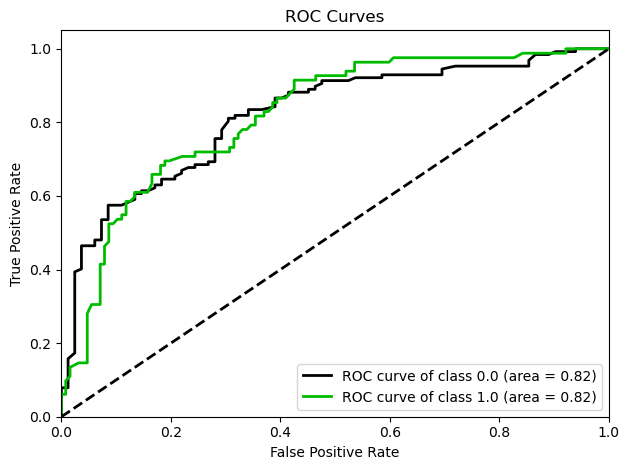

In [38]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q3')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [41]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [42]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression()

In [43]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression()

### Train Set

[[275 171]
 [165 281]]
Accuracy Score 0.6233183856502242
Classification report: 
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62       446
         1.0       0.62      0.63      0.63       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.62       892
weighted avg       0.62      0.62      0.62       892



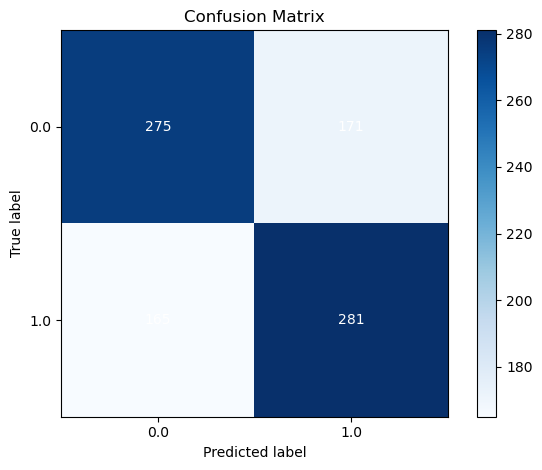

In [44]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[74 53]
 [27 55]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65       127
         1.0       0.51      0.67      0.58        82

    accuracy                           0.62       209
   macro avg       0.62      0.63      0.61       209
weighted avg       0.65      0.62      0.62       209



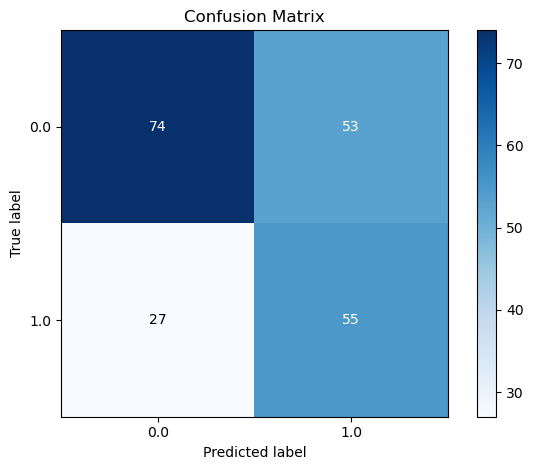

In [45]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [46]:
from sklearn.svm import SVC

In [48]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    #'C': [0.1, 1, 10, 100, 1000],
    #'gamma' : ['scale', 'auto'],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [49]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [50]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, gamma=1, kernel='poly', probability=True, random_state=42)

In [51]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, gamma=1, kernel='poly', probability=True, random_state=42)

### Train Set

[[358  88]
 [ 69 377]]
Accuracy Score 0.8239910313901345
Classification report: 
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       446
         1.0       0.81      0.85      0.83       446

    accuracy                           0.82       892
   macro avg       0.82      0.82      0.82       892
weighted avg       0.82      0.82      0.82       892



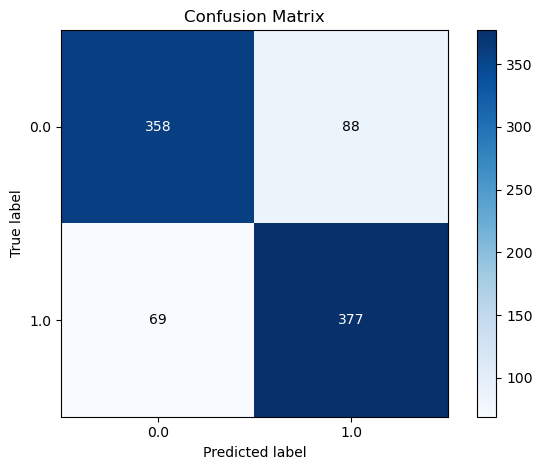

In [52]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[79 48]
 [25 57]]
Accuracy Score 0.6507177033492823
Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68       127
         1.0       0.54      0.70      0.61        82

    accuracy                           0.65       209
   macro avg       0.65      0.66      0.65       209
weighted avg       0.67      0.65      0.65       209



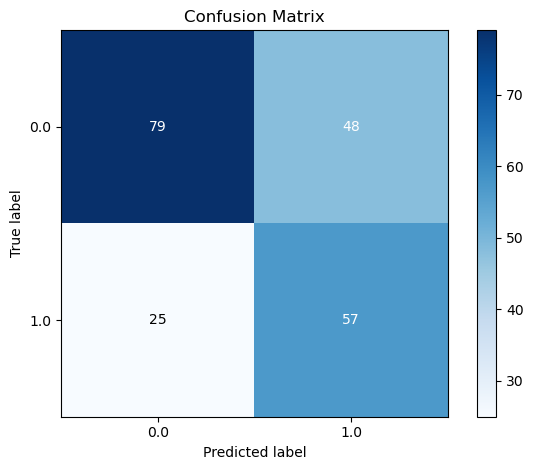

In [53]:
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [ ]:
from  sklearn.naive_bayes import MultinomialNB

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [ ]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

In [ ]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

In [ ]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

### Train Set

In [ ]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

In [ ]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [54]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [56]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        #('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('dt', DecisionTreeClassifier(max_depth=18)),
                             ('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features='log2')),
                             ('svc',
                              SVC(break_ties=True, gamma=1, kernel='poly',
                                  probability=True, random_state=42))])

In [57]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6411483253588517
DecisionTreeClassifier 0.7464114832535885
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.7416267942583732
SVC 0.6507177033492823
VotingClassifier 0.7272727272727273


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Accuracy Score 0.9091928251121076
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       446
         1.0       0.96      0.86      0.90       446

    accuracy                           0.91       892
   macro avg       0.91      0.91      0.91       892
weighted avg       0.91      0.91      0.91       892



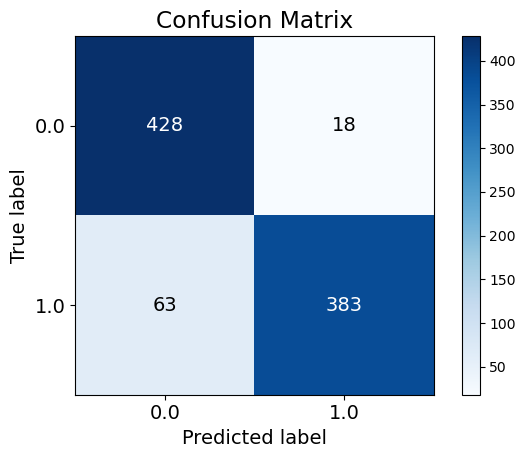

In [58]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.7272727272727273
Classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       127
         1.0       0.65      0.67      0.66        82

    accuracy                           0.73       209
   macro avg       0.71      0.72      0.72       209
weighted avg       0.73      0.73      0.73       209



C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

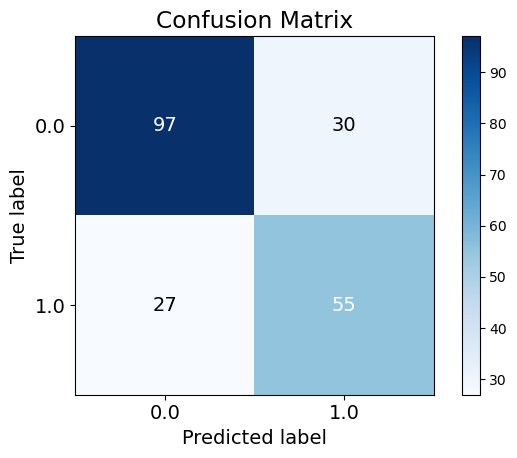

In [59]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


## out of bag evaluation

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [ ]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=15), n_estimators=100,
    learning_rate=0.4, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

In [ ]:
### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [ ]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

### Train Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [ ]:
#conda install -c conda-forge ds-lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [ ]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [ ]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [ ]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


In [ ]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



In [ ]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

### Feature Importance Plot

In [ ]:
feature_importance = explanation_lime.as_list()


In [ ]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [ ]:
feature_contributions = explanation_lime.local_exp[1]

In [ ]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [ ]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

### Explanation for class 0

In [ ]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


In [ ]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

# SHAP

In [ ]:
pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


In [ ]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

In [ ]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

In [ ]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)